## IMPORTS

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
%matplotlib inline

In [6]:
train=pd.read_csv("../data/Housing.csv")

## EDA

In [7]:
train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
train.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


<Axes: xlabel='price', ylabel='Count'>

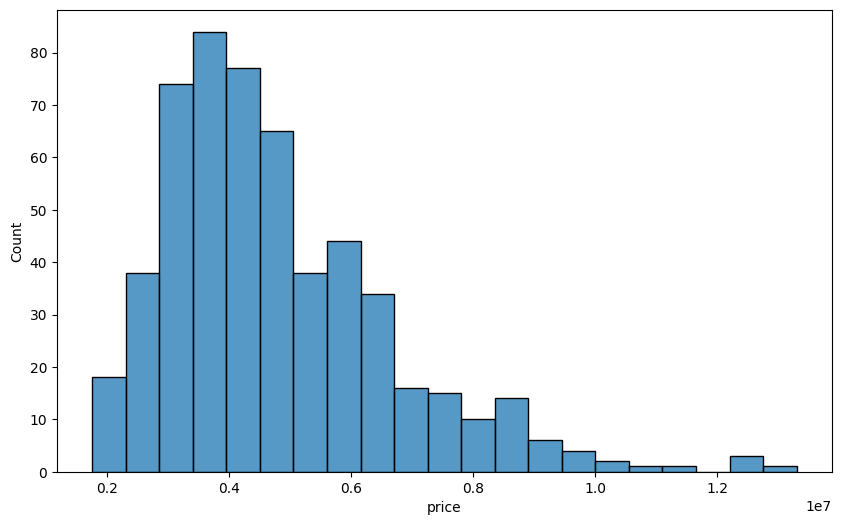

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(x=train['price'])

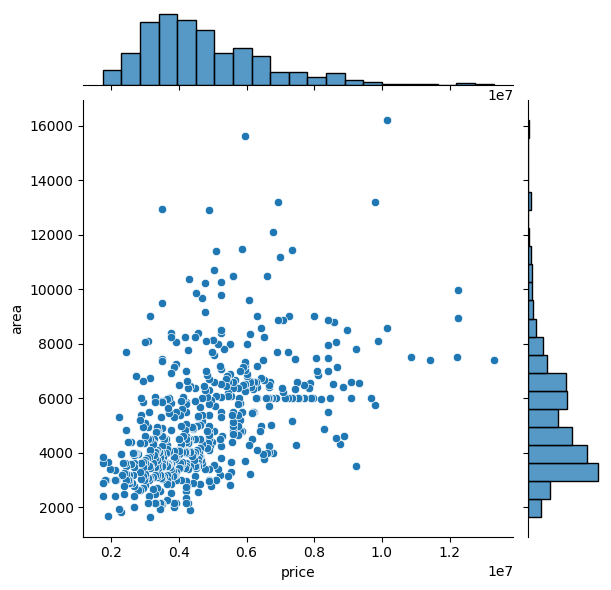

In [12]:
sns.jointplot(x=train['price'],y=train['area'])

<Axes: xlabel='bedrooms', ylabel='count'>

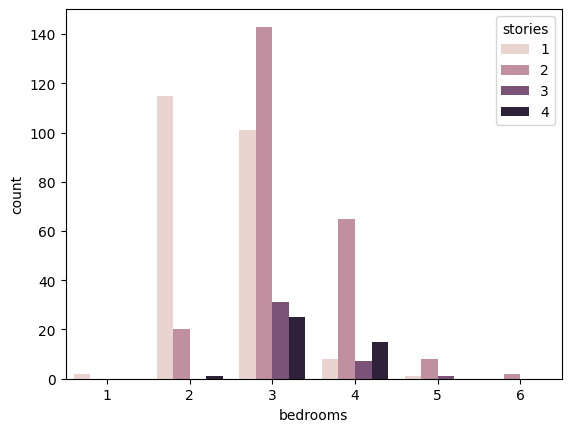

In [13]:
sns.countplot(x=train['bedrooms'],hue=train['stories'])

<Axes: xlabel='parking', ylabel='count'>

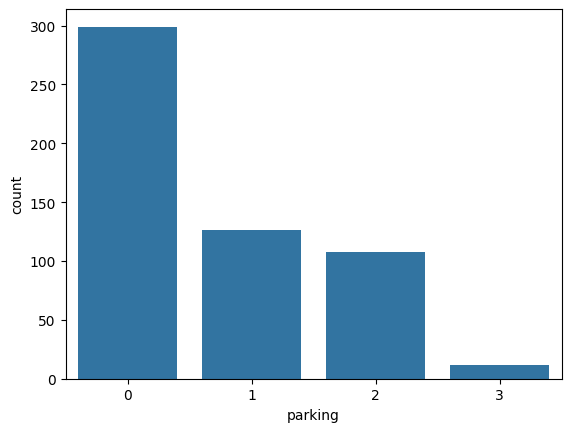

In [14]:
sns.countplot(x=train['parking'])

<Axes: xlabel='airconditioning', ylabel='count'>

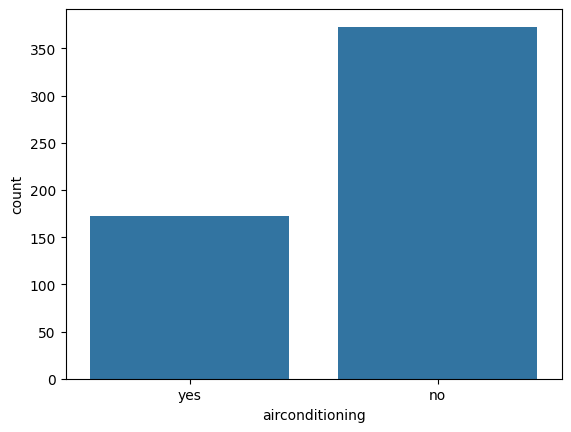

In [15]:
sns.countplot(x=train['airconditioning'])

<Axes: xlabel='furnishingstatus', ylabel='count'>

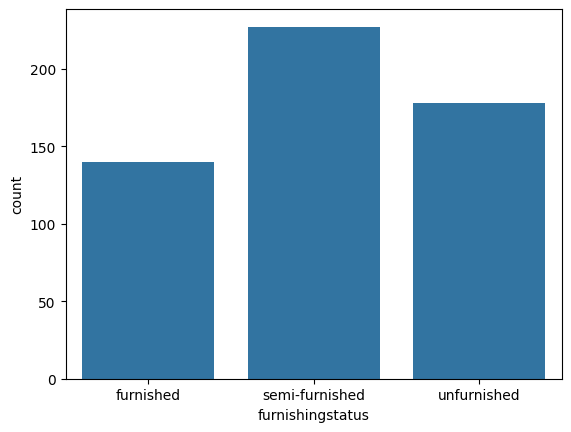

In [16]:
sns.countplot(x=train['furnishingstatus'])

## CONVERTING CATEGORICAL COLUMN INTO NUMERICAL COLUMN

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
cols=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
le=LabelEncoder()
for col in cols:
    train[col]=le.fit_transform(train[col])

In [19]:
train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


## TRAINING THE DATA

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=train.drop('price',axis=1)
y=train['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model=LinearRegression().fit(X_train,y_train)

In [24]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,5900,4,2,2,0,0,1,0,0,1,0,2
77,6500,3,2,3,1,0,0,0,1,0,1,0
360,4040,2,1,1,1,0,0,0,0,0,0,1
90,5000,3,1,2,1,0,0,0,1,0,0,1
493,3960,3,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17,8500,3,2,4,1,0,0,0,1,2,0,0
402,5880,2,1,1,1,0,0,0,0,0,0,2
66,13200,2,1,1,1,0,1,1,0,1,0,0
238,4510,4,2,2,1,0,1,0,0,0,0,1


In [25]:
predictions=model.predict(X_test)

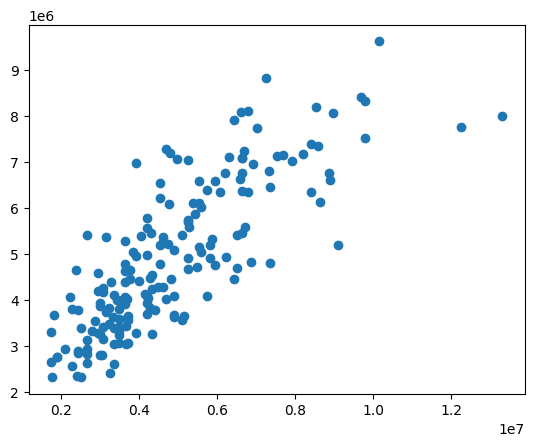

In [26]:
plt.scatter(y_test,predictions)

In [27]:
model.coef_

array([ 2.51340200e+02,  9.27166053e+04,  1.12647938e+06,  3.96248428e+05,
        4.10635156e+05,  3.20496711e+05,  4.84622279e+05,  6.23047393e+05,
        6.78375342e+05,  2.92410463e+05,  5.24417243e+05, -2.00615357e+05])

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [29]:
print('MAE:',mean_absolute_error(y_test,predictions))

MAE: 906953.7908301718


In [30]:
print('MSE:',mean_squared_error(y_test,predictions))

MSE: 1475542475754.5508


In [31]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions)))

RMSE: 1214719.093352266


In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.6557070707485257

In [35]:
### Saving the best model ###

# Saving model to disk
pickle.dump(model, open('../models/housse_model.pkl','wb'))